In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,precision_score,f1_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings

In [2]:
#Loading CSV File
df=pd.read_csv("Creditcarddata.csv")
#Printing the first 5 rows 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Printing last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
#Finding number of rows and columns
df.shape

(284807, 31)

In [5]:
#Describing the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Printing column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
#Printing Data Types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
#Data Cleaning
#Chceking for Duplicate Values
df[df.duplicated()==True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [10]:
df=df.drop_duplicates()

In [11]:
#Chceking Number of Rows and Columns
df.shape

(283726, 31)

In [12]:
#Chceking for Null Values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

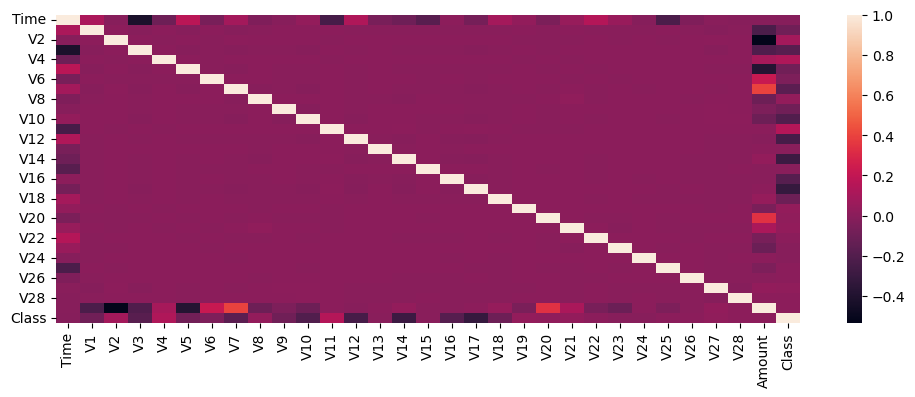

In [13]:
#Plotting the heatmap 
plt.figure(figsize=(12,4))
sns.heatmap(df.corr())
plt.show()

In [14]:
#Print first 2 rows
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [15]:
#Feature Scaling For Amount
#All the values were within same range except Amount so we did Feature Scaling to get in within same Range
s=StandardScaler()

In [16]:
df['Amount']=s.fit_transform(pd.DataFrame(df['Amount']))

In [17]:
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0


In [18]:
#Dropping Time Column 
df=df.drop('Time',axis=1)

In [19]:
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0


In [20]:
df.shape

(283726, 30)

In [21]:
#Checking Class values 
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

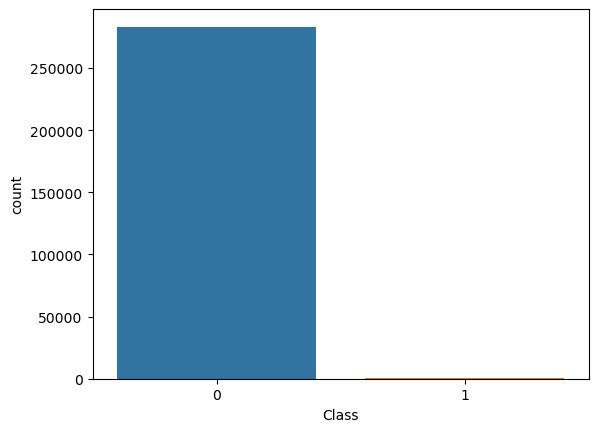

In [22]:
#Plotting values of Class
sns.countplot(x='Class',data=df)

In [23]:
#This is unbalanced because here we are having two classes in which one class(0) is having very high number of values but the other class(1) is having no values or less number of values.

In [24]:
#Printing first 2 Rows
df.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0


In [25]:
#Modelling
#Selecting Values of X and Y
x=df.drop("Class",axis=1)
y=df['Class']

In [26]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391


In [27]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 283726, dtype: int64

In [28]:
#Dividing into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(226980, 29)
(56746, 29)
(226980,)
(56746,)


In [29]:
#Handling Imbalanced DataSet
#UnderSampling
normal=df[df["Class"]==0]
fraud=df[df["Class"]==1]

In [30]:
normal.shape

(283253, 30)

In [31]:
fraud.shape

(473, 30)

In [32]:
#Selecting random sample with the help of Sample Method
#This will Select 473 Random Samples
normal_sample=normal.sample(n=1419)

In [33]:
normal_sample.shape

(1419, 30)

In [34]:
#Cocactenating
new_df=pd.concat([normal_sample,fraud],ignore_index=True)

In [35]:
new_df.to_csv('creditpred.csv')

In [36]:
new_df['Class'].value_counts()

0    1419
1     473
Name: Class, dtype: int64

In [37]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.105050,0.653320,1.225744,0.414033,0.177018,0.241674,0.380367,0.180441,-0.779430,-0.064872,...,-0.090511,-0.321217,0.118878,-0.303560,-0.550241,0.202973,0.031533,0.018720,-0.227807,0
1,0.916028,-0.650781,1.122367,0.142594,-0.540065,1.486431,-0.878704,0.583807,1.065335,-0.682837,...,-0.058482,0.172406,0.201011,-0.542625,-0.217428,1.044247,0.033912,0.011947,-0.141585,0
2,-0.198327,0.503617,0.478203,0.143766,-0.393599,0.982686,-0.733264,0.489533,1.609652,-0.811951,...,0.128689,0.744681,0.065909,-0.001523,-0.828259,0.294435,-0.533981,-0.270308,-0.229604,0
3,1.787564,-0.772917,-1.716604,-0.094166,0.421761,0.407842,0.047915,0.005713,0.837523,-0.130225,...,-0.089733,-0.384372,-0.015456,-0.330079,0.000814,-0.089731,-0.057776,-0.043684,0.257618,0
4,1.378634,-0.762695,0.205644,-2.616164,-1.501883,-1.937654,-0.269561,-0.458133,0.508582,-0.722663,...,-0.334564,-0.321997,0.029245,0.920819,0.553725,-0.857181,0.087885,0.037341,-0.255603,0


In [38]:
#Selecting X and Y
x=new_df.drop(["Class"],axis=1)
y=new_df['Class']

In [39]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.105050,0.653320,1.225744,0.414033,0.177018,0.241674,0.380367,0.180441,-0.779430,-0.064872,...,0.125917,-0.090511,-0.321217,0.118878,-0.303560,-0.550241,0.202973,0.031533,0.018720,-0.227807
1,0.916028,-0.650781,1.122367,0.142594,-0.540065,1.486431,-0.878704,0.583807,1.065335,-0.682837,...,-0.094660,-0.058482,0.172406,0.201011,-0.542625,-0.217428,1.044247,0.033912,0.011947,-0.141585
2,-0.198327,0.503617,0.478203,0.143766,-0.393599,0.982686,-0.733264,0.489533,1.609652,-0.811951,...,-0.170737,0.128689,0.744681,0.065909,-0.001523,-0.828259,0.294435,-0.533981,-0.270308,-0.229604
3,1.787564,-0.772917,-1.716604,-0.094166,0.421761,0.407842,0.047915,0.005713,0.837523,-0.130225,...,0.141833,-0.089733,-0.384372,-0.015456,-0.330079,0.000814,-0.089731,-0.057776,-0.043684,0.257618
4,1.378634,-0.762695,0.205644,-2.616164,-1.501883,-1.937654,-0.269561,-0.458133,0.508582,-0.722663,...,-0.421334,-0.334564,-0.321997,0.029245,0.920819,0.553725,-0.857181,0.087885,0.037341,-0.255603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.204187
1888,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350292
1889,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.042263
1890,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.625112


In [40]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1887    1
1888    1
1889    1
1890    1
1891    1
Name: Class, Length: 1892, dtype: int64

In [41]:
#Dividing into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1513, 29)
(379, 29)
(1513,)
(379,)


In [42]:
#Logistic Regression
a=LogisticRegression()
b=a.fit(x_train,y_train)

In [43]:
#Predicting values of Test and Train
y_pred_test=b.predict(x_test)
y_pred_train=b.predict(x_train)

In [44]:
y_pred_test

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [45]:
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
#Checking Accuracy Score
#Test Data
accuracy_score(y_test,y_pred_test)

0.9762532981530343

In [47]:
#Train Data
accuracy_score(y_train,y_pred_train)

0.9662921348314607

In [48]:
#Checking Precision Score
#Test Data
precision_score(y_test,y_pred_test)

0.9693877551020408

In [49]:
#Train Data
precision_score(y_train,y_pred_train)

0.9848942598187311

In [50]:
#Checking r2 Score
#Test Data
r2_score(y_test,y_pred_test)

0.8785169883894864

In [51]:
#Train Data
r2_score(y_train,y_pred_train)

0.8182055921517627

In [52]:
#Checking f1 score
#Test Data
f1_score(y_test,y_pred_test)

0.9547738693467337

In [53]:
#Train Data
f1_score(y_train,y_pred_train)

0.9274537695590327

In [54]:
#Checking recall Store
#Test Data
recall_score(y_test,y_pred_test)

0.9405940594059405

In [55]:
#Train Data
recall_score(y_train,y_pred_train)

0.8763440860215054

In [56]:
#Decision Tree Classifier
dt=DecisionTreeClassifier()
cd=dt.fit(x_train,y_train)

In [57]:
#Predicting test and Train Values
y_pred_testing=cd.predict(x_test)
y_pred_training=cd.predict(x_train)

In [58]:
y_pred_testing

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [59]:
y_pred_training

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [60]:
#Checking Accuracy Score
#Test Data
accuracy_score(y_test,y_pred_testing)

0.9525065963060686

In [61]:
#Train Data
accuracy_score(y_train,y_pred_training)

1.0

In [62]:
#Checking Precision Score
#Test Data
precision_score(y_test,y_pred_testing)

0.8738738738738738

In [63]:
#Train Data
precision_score(y_train,y_pred_training)

1.0

In [64]:
#Checking r2 Score
#Test Data
r2_score(y_test,y_pred_testing)

0.7570339767789729

In [65]:
#Train Data
r2_score(y_train,y_pred_training)

1.0

In [66]:
#Checking f1 score
#Test Data
f1_score(y_test,y_pred_testing)

0.9150943396226415

In [67]:
#Train Data
f1_score(y_train,y_pred_training)

1.0

In [68]:
#Checking recall Store
#Test Data
recall_score(y_test,y_pred_testing)

0.9603960396039604

In [69]:
#Train Data
recall_score(y_train,y_pred_training)

1.0

In [70]:
#Random Forest Classifier
r=RandomForestClassifier()
ra=r.fit(x_train,y_train)

In [71]:
#Predicting test and Train Values
y_pred_tested=r.predict(x_test)
y_pred_trained=r.predict(x_train)

In [72]:
y_pred_tested

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [73]:
y_pred_trained

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [74]:
#Checking Accuracy Score
#Test Data
accuracy_score(y_test,y_pred_tested)

0.9815303430079155

In [75]:
#Train Data
accuracy_score(y_train,y_pred_trained)

1.0

In [76]:
#Checking Precision Score
#Test Data
precision_score(y_test,y_pred_tested)

0.9795918367346939

In [77]:
#Train Data
precision_score(y_train,y_pred_trained)

1.0

In [78]:
#Checking r2 Score
#Test Data
r2_score(y_test,y_pred_tested)

0.9055132131918228

In [79]:
#Train Data
r2_score(y_train,y_pred_trained)

1.0

In [80]:
#Checking f1 score
#Test Data
f1_score(y_test,y_pred_tested)

0.964824120603015

In [81]:
#Train Data
f1_score(y_train,y_pred_trained)

1.0

In [82]:
#Checking recall Store
#Test Data
recall_score(y_test,y_pred_tested)

0.9504950495049505

In [83]:
#Train Data
recall_score(y_train,y_pred_trained)

1.0

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix# Standardize the features for SVM
scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# Create an SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions
y_pred_ = svm_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_)
precision = precision_score(y_test, y_pred_)
recall = recall_score(y_test, y_pred_)
f1 = f1_score(y_test, y_pred_)
conf_matrix = confusion_matrix(y_test, y_pred_)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9736
Precision: 0.9691
Recall: 0.9307
F1 Score: 0.9495
Confusion Matrix:
[[275   3]
 [  7  94]]


In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9710
Precision: 0.9787
Recall: 0.9109
F1 Score: 0.9436
Confusion Matrix:
[[276   2]
 [  9  92]]


In [86]:
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_gnb = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gnb)
precision = precision_score(y_test, y_pred_gnb)
recall = recall_score(y_test, y_pred_gnb)
f1 = f1_score(y_test, y_pred_gnb)
conf_matrix = confusion_matrix(y_test, y_pred_gnb)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9472
Precision: 0.8857
Recall: 0.9208
F1 Score: 0.9029
Confusion Matrix:
[[266  12]
 [  8  93]]


In [87]:
#Visualization of Accuracy Scores
fd=pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest','SVM', 'KNN','Gaussian Naive Bayes'],'ACC':[accuracy_score(y_test,y_pred_test)*100,
                                              accuracy_score(y_test,y_pred_testing)*100,
                                             accuracy_score(y_test,y_pred_tested)*100,
                                             accuracy_score(y_test,y_pred_)*100,
                                             accuracy_score(y_test,y_pred_knn)*100,
                                             accuracy_score(y_test,y_pred_gnb)*100                                                         
                                              ]})
           

In [88]:
fd

,Models,ACC
0,Logistic Regression,97.625330
1,Decision Tree,95.250660
2,Random Forest,98.153034
3,SVM,97.361478
4,KNN,97.097625
5,Gaussian Naive Bayes,94.722955


<Axes: xlabel='Models', ylabel='ACC'>

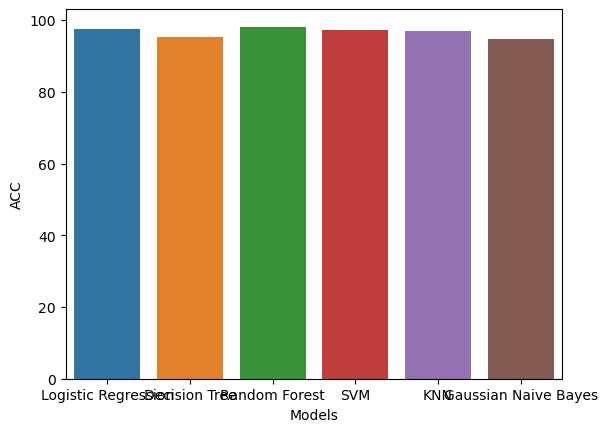

In [89]:
sns.barplot(x=fd['Models'],y=fd['ACC'])

In [90]:
r1=RandomForestClassifier()
r1.fit(x,y)

RandomForestClassifier()

In [91]:
#This library is used for serializing (saving) and deserializing (loading) Python objects, such as machine learning models, to and from files.
import joblib

In [92]:
#We are Saving the model by using dump method of joblib Library
joblib.dump(r1,"credit_card_model")

['credit_card_model']

In [93]:
#Loading the model
model=joblib.load("credit_card_model")

In [94]:
#Predicting
pred=model.predict(pd.DataFrame([[1.9919760961759,0.158475887304227,-2.58344064503516,0.408669992998441,1.15114706077937,-0.0966947441848027,0.223050267455537,-0.0683838777747007,0.577829383844873,-0.888721675865145,0.491140241656789,0.728903319843614,0.380428045513993,-1.94888334870021,-0.832498136300872,0.519435549203291,0.903562376617253,1.19731471799372,0.593508846946918,-0.0176522567052908,-0.164350327825504,-0.295135166851559,-0.0721725311018398,-0.450261313423321,0.313266608995469,-0.289616585696882,0.002987582243429,-0.0153088128485981,-0.1834779215302093]]))

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [95]:
if pred==0:
    print("NORMAL TRANSACTION")
else:
    print("FRAUDULENT TRANSACTION")

FRAUDULENT TRANSACTION


In [96]:
pip install dash dash-html-components dash-core-components

Note: you may need to restart the kernel to use updated packages.


In [97]:
pip install dash plotly


Note: you may need to restart the kernel to use updated packages.


In [98]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import joblib

# Load the trained model
model = joblib.load('credit_card_model')

# Define the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Credit Card Fraud Detection System", style={'color': 'black', 'marginBottom': 20, 'marginLeft': 200}),
    html.H2("Summary and Visualisations", style={'color': 'black', 'marginBottom': 20, 'marginLeft': 250}),
     # Count Plot
     html.Div([
        html.H3("Count Plot Visualization"),
        dcc.Graph(
        id='count-plot',
        figure={
            'data': [
                go.Bar(x=df['Class'].value_counts().index, y=df['Class'].value_counts().values)
            ],
            'layout': go.Layout(
                title='Count Plot of Class',
                xaxis=dict(title='Class'),
                yaxis=dict(title='Count'),
                barmode='group',
            ),
        },
    ),
    ]),
        # Heatmap
    html.Div([
        html.H3("Heatmap Visualization"),
        dcc.Graph(
            id='heatmap',
            figure={
                'data': [
                    go.Heatmap(
                        z=df.corr().values,  
                        x=df.columns,
                        y=df.columns,
                        colorscale='Viridis',
                    )
                ],
                'layout': {
                    'title': 'Heatmap',
                }
            },
        ),
    ]),

    html.Div(children=[
        html.H3(children='Accuracy Score Visualizations'),  # Sub-heading for visualizations

        dcc.Graph(
            id='bar-plot',
            figure={
                'data': [go.Bar(x=fd['Models'], y=fd['ACC'])],
                'layout': go.Layout(
                    title='Accuracy Score of Various Models',
                    xaxis=dict(title='Models'),
                    yaxis=dict(title='Accuracy'),
                    barmode='group',
                ),
            },
        )
    ]),
    
    html.Div([
        html.Label("Enter value of V1"),
        dcc.Input(id='input-v1', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V2"),
    dcc.Input(id='input-v2', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V3"),
    dcc.Input(id='input-v3', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V4"),
    dcc.Input(id='input-v4', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V5"),
    dcc.Input(id='input-v5', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V6"),
    dcc.Input(id='input-v6', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V7"),
    dcc.Input(id='input-v7', type='number', value=0, style={'marginBottom': 10}),
    ]),
        
    html.Div([
    html.Label("Enter value of V8"),
    dcc.Input(id='input-v8', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V9"),
    dcc.Input(id='input-v9', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V10"),
    dcc.Input(id='input-v10', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V11"),
    dcc.Input(id='input-v11', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V12"),
    dcc.Input(id='input-v12', type='number', value=0, style={'marginBottom': 10}),
    ]),
    html.Div([
    html.Label("Enter value of V13"),
    dcc.Input(id='input-v13', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V14"),
    dcc.Input(id='input-v14', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V15"),
    dcc.Input(id='input-v15', type='number', value=0, style={'marginBottom': 10}),
    ]),
    html.Div([
    html.Label("Enter value of V16"),
    dcc.Input(id='input-v16', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V17"),
    dcc.Input(id='input-v17', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V18"),
    dcc.Input(id='input-v18', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V19"),
    dcc.Input(id='input-v19', type='number', value=0, style={'marginBottom': 10}),
    ]),
        
    html.Div([
    html.Label("Enter value of V20"),
    dcc.Input(id='input-v20', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V21"),
    dcc.Input(id='input-v21', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V22"),
    dcc.Input(id='input-v22', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V23"),
    dcc.Input(id='input-v23', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V24"),
    dcc.Input(id='input-v24', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V25"),
    dcc.Input(id='input-v25', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V26"),
    dcc.Input(id='input-v26', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V27"),
    dcc.Input(id='input-v27', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V28"),
    dcc.Input(id='input-v28', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Div([
    html.Label("Enter value of V29"),
    dcc.Input(id='input-v29', type='number', value=0, style={'marginBottom': 10}),
    ]),
    
    html.Button('Predict', id='predict-button', n_clicks=0, 
                style={'backgroundColor': 'black', 'color': 'white', 'marginTop': 10,
                       'borderRadius': '50px', 'fontSize': '25px', 'fontFamily': 'Calibri'}),
    
    html.Div(id='prediction-output', style={'color': 'black', 'marginTop': 20, 'marginLeft': 150, 'fontSize': '30px', 'fontFamily': 'Calibri'})
])

# Define the callback to update the prediction
@app.callback(
    Output('prediction-output', 'children'),
    [Input('predict-button', 'n_clicks')],
    [
        Input('input-v1', 'value'),
        Input('input-v2', 'value'),
        Input('input-v3', 'value'),
        Input('input-v4', 'value'),
        Input('input-v5', 'value'),
        Input('input-v6', 'value'),
        Input('input-v7', 'value'),
        Input('input-v8', 'value'),
        Input('input-v9', 'value'),
        Input('input-v10', 'value'),
        Input('input-v11', 'value'),
        Input('input-v12', 'value'),
        Input('input-v13', 'value'),
        Input('input-v14', 'value'),
        Input('input-v15', 'value'),
        Input('input-v16', 'value'),
        Input('input-v17', 'value'),
        Input('input-v18', 'value'),
        Input('input-v19', 'value'),
        Input('input-v20', 'value'),
        Input('input-v21', 'value'),
        Input('input-v22', 'value'),
        Input('input-v23', 'value'),
        Input('input-v24', 'value'),
        Input('input-v25', 'value'),
        Input('input-v26', 'value'),
        Input('input-v27', 'value'),
        Input('input-v28', 'value'),
        Input('input-v29', 'value'),
        # ... (add other input components)
    ]
)
def update_prediction(n_clicks, v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, v29):
    values = [[v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15, v16, v17, v18, v19, v20, v21, v22, v23, v24, v25, v26, v27, v28, v29]]
    y_pred = model.predict(values)
    result = "Normal Transaction" if y_pred == 0 else "Fraudulent Transaction"
    return f"Final Prediction from the model: {result}"

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

